In [1]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
from pytrends.request import TrendReq

In [2]:
# Create pytrends obj
pytrend = TrendReq()

In [3]:
# Create list with keywords
kw_list = ['pasen', 'valentijnsdag']

# Create payload
pytrend.build_payload(kw_list, timeframe='2016-01-01 2016-05-30', geo='NL')

# Get interest over time, in a dataframe and reset it's index
interest = pytrend.interest_over_time().reset_index()

filter1 = interest['date'].dt.month >= 2
filter2 = interest['date'].dt.month <= 5
q1_interest= interest.where(filter1 & filter2).dropna()

In [5]:
pd.set_option('display.max_columns', q1_interest.shape[1])
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
print(q1_interest)

          date  pasen  valentijnsdag  isPartial
31  2016-02-01    3.0            2.0        0.0
32  2016-02-02    3.0            4.0        0.0
33  2016-02-03    3.0            2.0        0.0
34  2016-02-04    3.0            3.0        0.0
35  2016-02-05    3.0            3.0        0.0
36  2016-02-06    3.0            3.0        0.0
37  2016-02-07    3.0            4.0        0.0
38  2016-02-08    3.0            4.0        0.0
39  2016-02-09    4.0            5.0        0.0
40  2016-02-10    3.0            5.0        0.0
41  2016-02-11    4.0            6.0        0.0
42  2016-02-12    4.0            9.0        0.0
43  2016-02-13    2.0           14.0        0.0
44  2016-02-14    4.0           43.0        0.0
45  2016-02-15    5.0            2.0        0.0
46  2016-02-16    4.0            0.0        0.0
47  2016-02-17    3.0            0.0        0.0
48  2016-02-18    5.0            0.0        0.0
49  2016-02-19    4.0            0.0        0.0
50  2016-02-20    4.0            0.0    

In [6]:
# Define X and Y
x = q1_interest['date'].where(q1_interest['date'].dt.year == 2016)
y1 = q1_interest['pasen']
y2 = q1_interest['valentijnsdag']

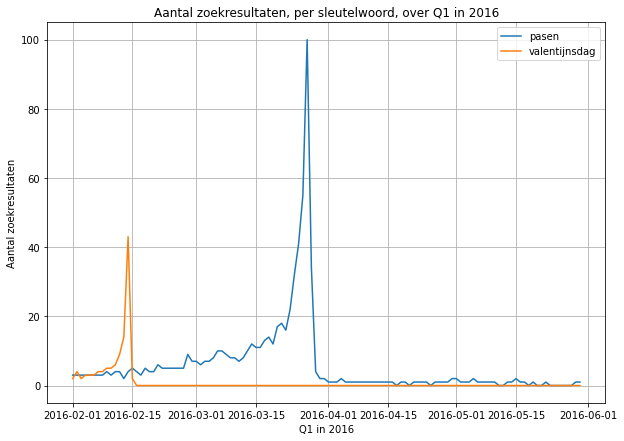

In [7]:
# Plot graphs
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(x, y1, label='pasen', linestyle='-')
ax.plot(x, y2, label='valentijnsdag', linestyle='-')
ax.set(
    xlabel='Q1 in 2016',
    ylabel='Aantal zoekresultaten',
    title='Aantal zoekresultaten, per sleutelwoord, over Q1 in 2016')
ax.grid()
plt.legend()
plt.show()